In [1]:
import re 
import math 
import eli5
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

import sklearn 
from sklearn.linear_model import (
  LogisticRegression,
  SGDClassifier
)
from sklearn.svm import (
  LinearSVC, 
  SVC 
)
from sklearn.neighbors import (
  KNeighborsClassifier
)
from sklearn.naive_bayes import (
  GaussianNB
)
from sklearn.tree import (
  DecisionTreeClassifier
)
from sklearn.ensemble import (
  RandomForestClassifier,
  RandomForestRegressor
)
from xgboost import (
  XGBClassifier
)
from sklearn.neural_network import (
  MLPClassifier
)

from sklearn.model_selection import (
  train_test_split,
  GridSearchCV,
  StratifiedKFold
)
from sklearn.preprocessing import (
  LabelEncoder
)
from sklearn.metrics import (
  precision_score, 
  accuracy_score, 
  recall_score,
  f1_score, 
  roc_auc_score,
  mean_absolute_error,  
  confusion_matrix, 
  classification_report
)

sns.set_style('whitegrid')

In [2]:
PATH = '../data/test_dataset/CSIC2010/csic_database.csv'
df = pd.read_csv(PATH)

df = df.rename(columns={'Unnamed: 0': 'Class'})
df = df.rename(columns={'lenght': 'content_length'})

#df = df.drop(columns=[])

display(df.head())

,Class,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,content_length,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [3]:
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of samples: 61065
Number of features: 17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            61065 non-null  object
 1   Method           61065 non-null  object
 2   User-Agent       61065 non-null  object
 3   Pragma           61065 non-null  object
 4   Cache-Control    61065 non-null  object
 5   Accept           60668 non-null  object
 6   Accept-encoding  61065 non-null  object
 7   Accept-charset   61065 non-null  object
 8   language         61065 non-null  object
 9   host             61065 non-null  object
 10  cookie           61065 non-null  object
 11  content-type     17977 non-null  object
 12  connection       61065 non-null  object
 13  content_length   17977 non-null  object
 14  content          17977 non-null  object
 15  classification   61065 non-null  int64 
 16  URL              61065 non-null  object
dtypes: int64(1), object(16)
memory 

In [5]:
feature_cols = df.columns.tolist()
for col in feature_cols:
  continue
  # sns.countplot(data=df, x=col)

<Axes: xlabel='Method', ylabel='count'>

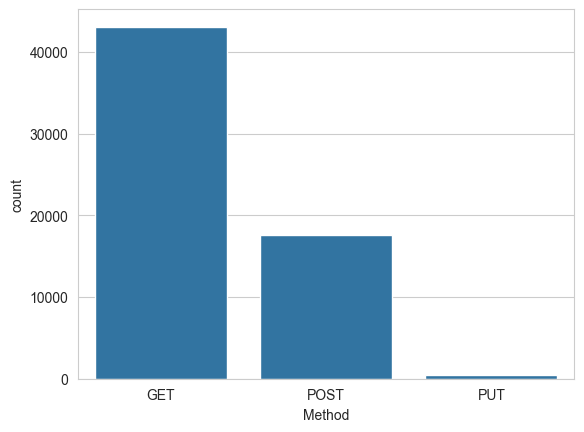

In [6]:
sns.countplot(data=df, x='Method')